# **Vectors in Python**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# create a vector
v = np.array([3,5])
v

array([3, 5])

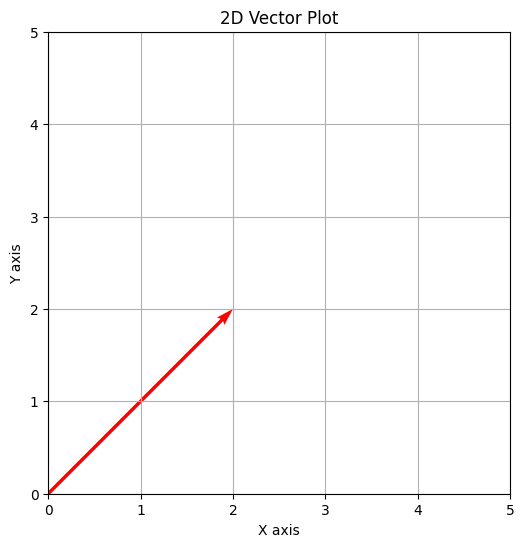

In [24]:
# plot the vector v
plt.figure(figsize=(8,6))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.xlim(0,5)
plt.ylim(0,5)
plt.grid()
plt.title('2D Vector Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

----
## Linear Transformation of Vectors

\[
\begin{bmatrix}
\cos(45^\circ) & -\sin(45^\circ) \\
\sin(45^\circ) & \cos(45^\circ)
\end{bmatrix}
\]

In [25]:
# Define the rotation matrix for 45 degree rotation
theta = np.radians(90)  # Converting 45 degrees to radians
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                            [np.sin(theta), np.cos(theta)]])

print(rotation_matrix)
print("------------------------")
print(v)
# Applying the transformation
v_transformed = np.dot(rotation_matrix, v)
v_transformed

[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
------------------------
[3 5]


array([-5.,  3.])

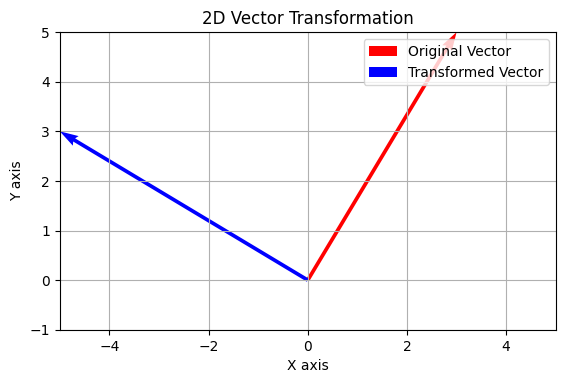

In [26]:
# Plotting the original and transformed vectors
plt.figure()
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
plt.quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='b', label='Transformed Vector')
plt.xlim(-5, 5)
plt.ylim(-1, 5)
plt.grid()
plt.title('2D Vector Transformation')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

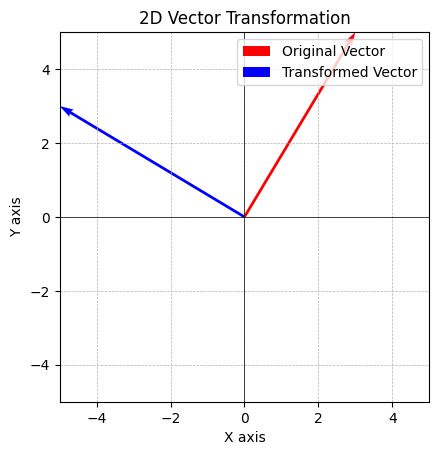

In [27]:
# Adjusting the plot to show the grid lines behind the vectors
plt.figure()
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
plt.quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='b', label='Transformed Vector')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k',linewidth=0.5)
plt.axvline(x=0, color='k',linewidth=0.5)
plt.title('2D Vector Transformation')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

---
## Shear Transformation

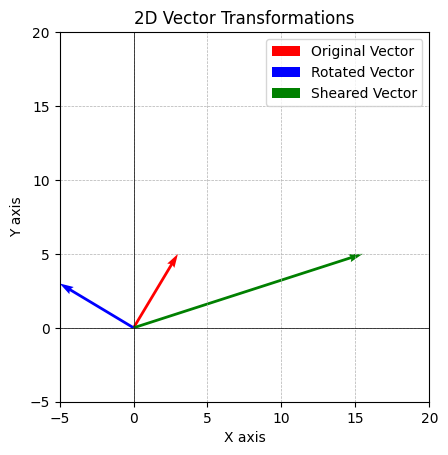

In [28]:
# Define the shear matrix for shearing along the x-axis with k = 1.5
shear_factor = 2.5
shear_matrix = np.array([[1, shear_factor], [0, 1]])

# Applying the shear transformation
v_sheared = np.dot(shear_matrix, v)

# Plotting the original, rotated, and sheared vectors
plt.figure()
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
plt.quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='b', label='Rotated Vector')
plt.quiver(0, 0, v_sheared[0], v_sheared[1], angles='xy', scale_units='xy', scale=1, color='g', label='Sheared Vector')
plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0, color='k',linewidth=0.5)
plt.axvline(x=0, color='k',linewidth=0.5)
plt.title('2D Vector Transformations')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

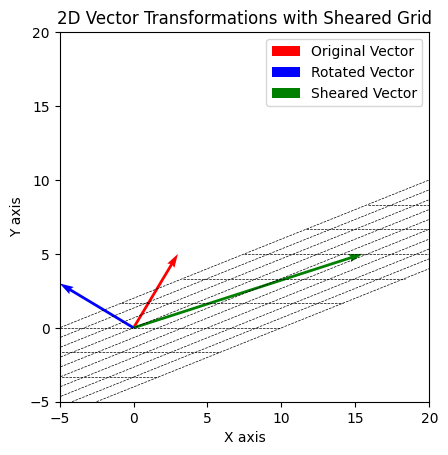

In [29]:
# Adjusting the plot to include the effect of shearing on the grid lines
# Creating a grid of points
x = np.linspace(-5, 10, 10)
y = np.linspace(-5, 10, 10)
X, Y = np.meshgrid(x, y)

# Applying shear transformation to the grid points
X_sheared, Y_sheared = np.dot(shear_matrix, [X.ravel(), Y.ravel()])
X_sheared = X_sheared.reshape(X.shape)
Y_sheared = Y_sheared.reshape(Y.shape)

# Plotting the sheared grid lines
plt.figure()
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
plt.quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='b', label='Rotated Vector')
plt.quiver(0, 0, v_sheared[0], v_sheared[1], angles='xy', scale_units='xy', scale=1, color='g', label='Sheared Vector')

for i in range(len(x)):
    plt.plot(X_sheared[i, :], Y_sheared[i, :], 'k--', linewidth=0.5)
    plt.plot(X_sheared[:, i], Y_sheared[:, i], 'k--', linewidth=0.5)

plt.xlim(-5, 20)
plt.ylim(-5, 20)
plt.title('2D Vector Transformations with Sheared Grid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

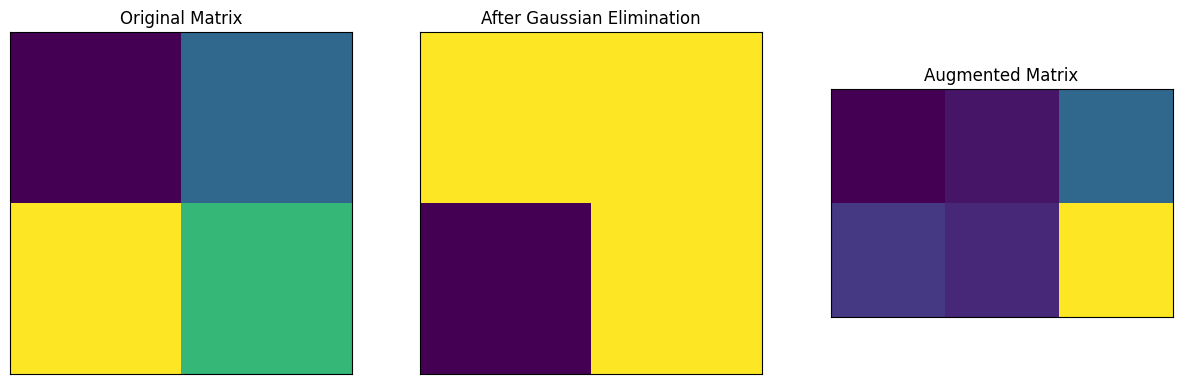

array([4., 0.])

In [30]:
def gaussian_elimination(A, b):
    """
    Perform Gaussian elimination on system Ax = b.

    Args:
    A (numpy.ndarray): Coefficient matrix.
    b (numpy.ndarray): Right-hand side vector.

    Returns:
    numpy.ndarray: The solution vector x.
    """
    # Form the augmented matrix
    augmented_matrix = np.hstack((A, b.reshape(-1, 1)))

    # Number of rows
    n = len(b)

    # Gaussian elimination
    for i in range(n):
        # Make the diagonal element 1
        a = augmented_matrix[i, i]
        augmented_matrix[i] = augmented_matrix[i] / a

        # Make the below rows' corresponding column elements 0
        for j in range(i+1, n):
            b = augmented_matrix[j, i]
            augmented_matrix[j] = augmented_matrix[j] - b * augmented_matrix[i]

    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = augmented_matrix[i, n] - np.dot(augmented_matrix[i, i+1:n], x[i+1:n])

    return x, augmented_matrix

# Define the system
A = np.array([[2, 3], [5, 4]])
b = np.array([8, 20])

# Perform Gaussian elimination
solution, transformation_steps = gaussian_elimination(A, b)

# Plotting the intermediate steps
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs[0].matshow(A, cmap='viridis')
axs[0].set_title('Original Matrix')
axs[1].matshow(transformation_steps[:, :-1], cmap='viridis')
axs[1].set_title('After Gaussian Elimination')
axs[2].matshow(np.column_stack((A, b)), cmap='viridis')
axs[2].set_title('Augmented Matrix')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

solution